In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import calendar
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go

offline.init_notebook_mode(connected = True)
df_oil = pd.read_csv('oil.csv')
df_holidays_events = pd.read_csv('holidays_events.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')
df_stores = pd.read_csv('stores.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_transactions = pd.read_csv('transactions.csv')


/var/folders/58/jt8r497132q6cyg8d_4hrs7r0000gn/T/ipykernel_79672/2369541734.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# # label encoding categorical variables
# le = LabelEncoder()
# df_holidays_events['type_enc'] = le.fit_transform(df_holidays_events['type'])
# df_holidays_events['locale_enc'] = le.fit_transform(df_holidays_events['locale'])
# df_holidays_events['locale_name_enc'] = le.fit_transform(df_holidays_events['locale_name'])
# df_holidays_events['description_enc'] = le.fit_transform(df_holidays_events['description'])
# df_holidays_events['transferred_enc'] = le.fit_transform(df_holidays_events['transferred'])

# df_stores['city_enc'] = le.fit_transform(df_stores['city'])
# df_stores['state_enc'] = le.fit_transform(df_stores['state'])
# df_stores['type_enc'] = le.fit_transform(df_stores['type'])

# df_test['family_enc'] = le.fit_transform(df_test['family'])
# df_train['family_enc'] = le.fit_transform(df_train['family'])

# df_train.head()

In [3]:
# # extracting encoding labels for future reference
# type_labels = df_holidays_events[['type', 'type_enc']].drop_duplicates().sort_values('type_enc')
# locale_labels = df_holidays_events[['locale', 'locale_enc']].drop_duplicates().sort_values('locale_enc')
# locale_name_labels = df_holidays_events[['locale_name', 'locale_name_enc']].drop_duplicates().sort_values('locale_name_enc')
# description_labels = df_holidays_events[['description', 'description_enc']].drop_duplicates().sort_values('description_enc')
# transferred_labels = df_holidays_events[['transferred', 'transferred_enc']].drop_duplicates().sort_values('transferred_enc')
# locale_name_labels.head()

In [4]:
import numpy as np
import pandas as pd

# Calculate median of preceding and following values
df_oil['Prev_Amount'] = df_oil['dcoilwtico'].shift(1)
df_oil['Next_Amount'] = df_oil['dcoilwtico'].shift(-1)

# Calculate the median
df_oil['Median_Prev_Next'] = df_oil[['Prev_Amount', 'Next_Amount']].median(axis=1)

# Fill null values in 'Amount' column with the calculated medians
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].fillna(df_oil['Median_Prev_Next'])

# Drop unnecessary columns
df_oill = df_oil.drop(['Prev_Amount', 'Next_Amount', 'Median_Prev_Next'], axis=1)

# Display the DataFrame
print(df_oill)


            date  dcoilwtico
0     2013-01-01       93.14
1     2013-01-02       93.14
2     2013-01-03       92.97
3     2013-01-04       93.12
4     2013-01-07       93.20
...          ...         ...
1213  2017-08-25       47.65
1214  2017-08-28       46.40
1215  2017-08-29       46.46
1216  2017-08-30       45.96
1217  2017-08-31       47.26

[1218 rows x 2 columns]


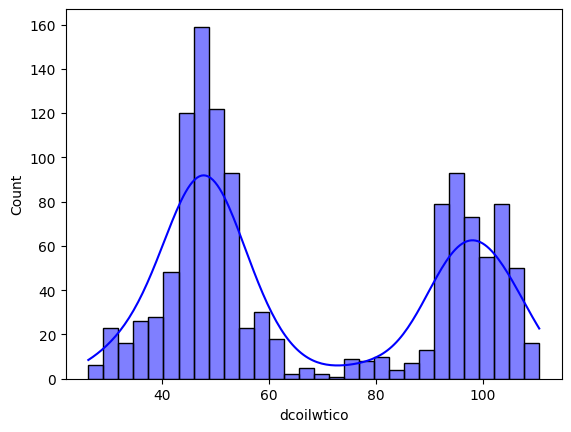

In [5]:
sns.histplot(df_oill["dcoilwtico"], bins=30, kde=True, color='blue')
plt.show()

In [6]:
# copying of train data and merging other data
df_train1 = df_train.merge(df_holidays_events, on = 'date', how='left')
df_train1 = df_train1.merge(df_oill, on = 'date', how='left')
df_train1 = df_train1.merge(df_stores, on = 'store_nbr', how='left')
df_train1 = df_train1.merge(df_transactions, on = ['date', 'store_nbr'], how='left')
df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

df_train1['date'] = pd.to_datetime(df_train1['date'])
df_train1['year'] = df_train1['date'].dt.year
df_train1['month'] = df_train1['date'].dt.month
df_train1['week'] = df_train1['date'].dt.isocalendar().week
df_train1['quarter'] = df_train1['date'].dt.quarter
df_train1['day_of_week'] = df_train1['date'].dt.day_name()
df_train1.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday


In [7]:
label_encoder = LabelEncoder()
columns_to_encode = ['family', 'holiday_type', 'locale', 'locale_name']
for column in columns_to_encode:
    df_train1[column] = label_encoder.fit_transform(df_train1[column])


In [8]:
df_train1.head(80)

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,0,0.0,0,3,1,4,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,1,2013-01-01,1,1,0.0,0,3,1,4,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
2,2,2013-01-01,1,2,0.0,0,3,1,4,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
3,3,2013-01-01,1,3,0.0,0,3,1,4,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
4,4,2013-01-01,1,4,0.0,0,3,1,4,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,2013-01-01,11,9,0.0,0,3,1,4,Primer dia del ano,...,Cayambe,Pichincha,B,6,NaN,2013,1,1,1,Tuesday
76,76,2013-01-01,11,10,0.0,0,3,1,4,Primer dia del ano,...,Cayambe,Pichincha,B,6,NaN,2013,1,1,1,Tuesday
77,77,2013-01-01,11,11,0.0,0,3,1,4,Primer dia del ano,...,Cayambe,Pichincha,B,6,NaN,2013,1,1,1,Tuesday
78,78,2013-01-01,11,12,0.0,0,3,1,4,Primer dia del ano,...,Cayambe,Pichincha,B,6,NaN,2013,1,1,1,Tuesday


In [9]:
dff = df_train1[['holiday_type', 'family', 'locale', 'locale_name']]


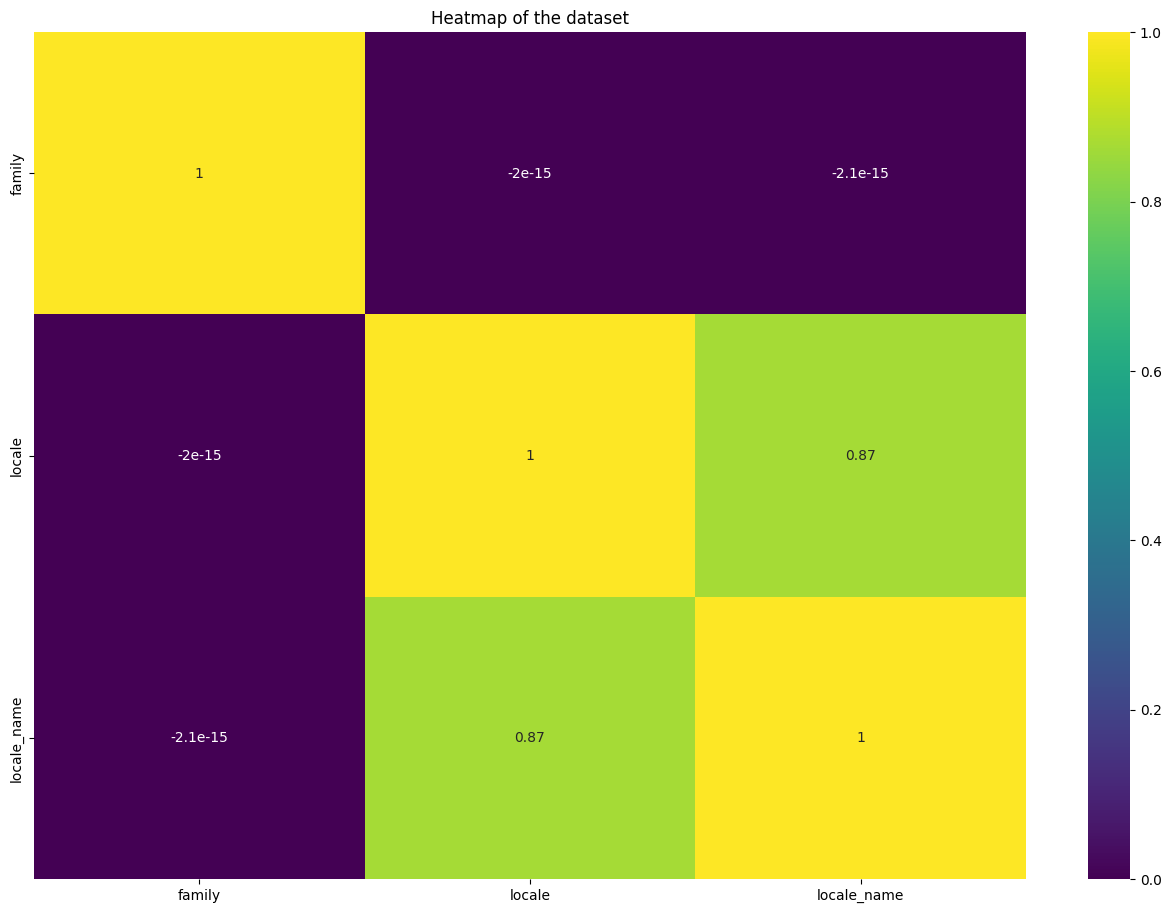

In [10]:
# CORRELATION MATRIX
# Calculating the correlation matrix
corr = dff.iloc[:,1:].corr()
# Plotting the correlation matrix
plt.figure(figsize=(16,11))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Heatmap of the dataset')
plt.show()

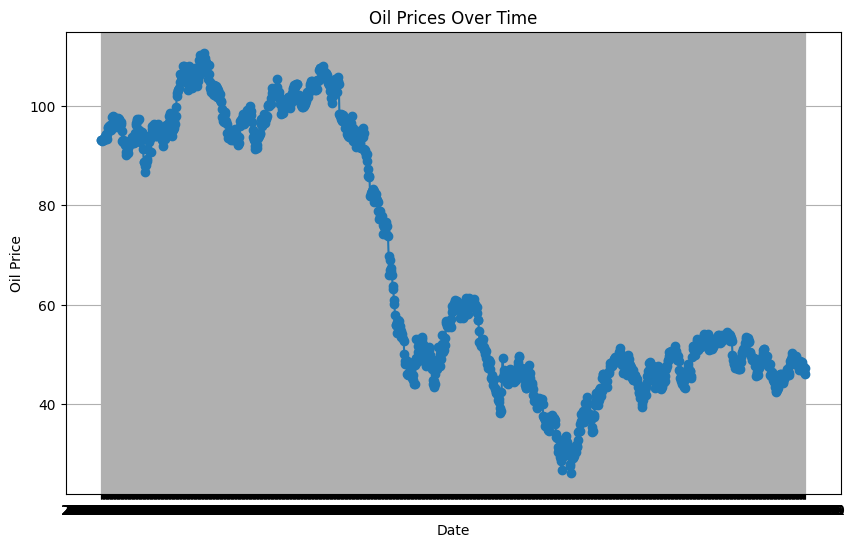

In [11]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_oil['date'], df_oil['dcoilwtico'], marker='o', linestyle='-')
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.grid(True)
plt.show()